# Probability Distirbutions

##### The variance is the spread of the values of a random variable from the mean. This is typically denoted as a function V ar; for example, V ar(X) is the variance of the random variable X or V ar(f (x)) for the variance of values drawn from the domain of X using the function f (). The square root of the variance normalizes the value and is referred to as the standard deviation. The variance between two variables is called the covariance and summarizes the linear relationship for how two random variables change together.

- Expected Value. The average value of a random variable.
- Variance. The average spread of values around the expected value.

## Discrete Probability Distributions
#### A discrete probability distribution summarizes the probabilities for a discrete random variable. The probability mass function, or PMF, defines the probability distribution for a discrete random variable. It is a function that assigns a probability for specific discrete values. A discrete probability distribution has a cumulative distribution function, or CDF. This is a function that assigns a probability that a discrete random variable will have a value of less than or equal to a specific discrete value.

- Probability Mass Function. Probability for a value for a discrete random variable.
- Cumulative Distribution Function. Probability less than or equal to a value for a
random variable.

## Continuous Probability Distributions
#### A continuous probability distribution summarizes the probability for a continuous random variable. The probability distribution function, or PDF, defines the probability distribution for a continuous random variable. Note the difference in the name from the discrete random variable that has a probability mass function, or PMF. Like a discrete probability distribution, the continuous probability distribution also has a cumulative distribution function, or CDF, that defines the probability of a value less than or equal to a specific numerical value from the domain.

- Probability Distribution Function. Probability for a value for a continuous random variable.
- Cumulative Distribution Function. Probability less than or equal to a value for a random variable.

In [5]:
# example of simulating a binomial process and counting success
from numpy.random import binomial
import numpy as np
# define the parameters of the distribution 
p = 0.3
k = 100
# run a single simulation
success = binomial(k, p)
print('Total Success: %d' % success)

Total Success: 33


In [6]:
# calculate moments of a binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# calculate moments
mean, var, _, _ = binom.stats(k, p, moments='mvsk') 
print('Mean=%.3f, Variance=%.3f' % (mean, var))
print("Sqrt", np.sqrt(var))


Mean=30.000, Variance=21.000
Sqrt 4.58257569495584


#### We can calculate the moments of this distribution, specifically the expected value or mean and the variance using the binom.stats() SciPy function. Running the example reports the expected value of the distribution, which is 30, as we would expect, as well as the variance of 21, which if we calculate the square root, gives us the standard deviation of about 4.5.


#### We can use the probability mass function to calculate the likelihood of different numbers of successful outcomes for a sequence of trials, such as 10, 20, 30, to 100. We would expect 30 successful outcomes to have the highest probability.

In [8]:
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of n successes
for n in range(10, 110, 10):
  print('P of %d success: %.3f%%' % (n, dist.pmf(n)*100))

P of 10 success: 0.000%
P of 20 success: 0.758%
P of 30 success: 8.678%
P of 40 success: 0.849%
P of 50 success: 0.001%
P of 60 success: 0.000%
P of 70 success: 0.000%
P of 80 success: 0.000%
P of 90 success: 0.000%
P of 100 success: 0.000%


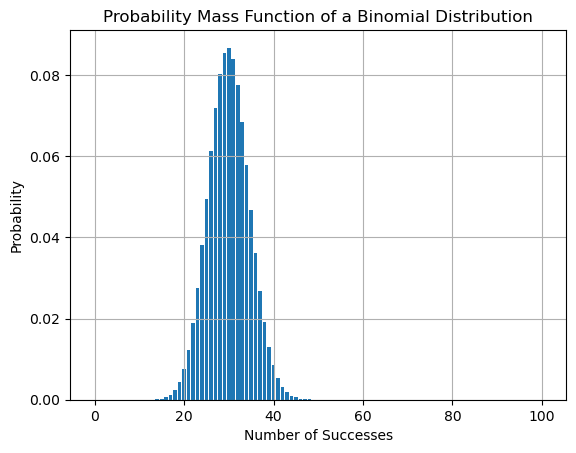

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of possible number of successes from 0 to k
x = np.arange(0, k+1)
pmf = dist.pmf(x)

plt.bar(x, pmf)
plt.title('Probability Mass Function of a Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


#### The PMF (Probability Mass Function) function is used to calculate the likelihood or probability of achieving a specific number of successes, which you specify as an input to the function, in a given number of trials (defined by the binomial distribution parameters).

In [2]:
# example of using the cdf for the binomial distribution
from scipy.stats import binom
# define the parameters of the distribution
p = 0.3
k = 100
# define the distribution
dist = binom(k, p)
# calculate the probability of <=n successes
for n in range(10, 110, 10):
  print('P of %d success: %.3f%%' % (n, dist.cdf(n)*100))

P of 10 success: 0.000%
P of 20 success: 1.646%
P of 30 success: 54.912%
P of 40 success: 98.750%
P of 50 success: 99.999%
P of 60 success: 100.000%
P of 70 success: 100.000%
P of 80 success: 100.000%
P of 90 success: 100.000%
P of 100 success: 100.000%


## Why Use the CDF?
- The CDF is particularly useful when you need to understand the probability of achieving a result within a certain range. For instance, in quality control or risk management, you might want to know the likelihood of achieving no more than a certain number of defects or failures.

## Summary
- The CDF provides cumulative probabilities, offering a broader view of the likelihood of outcomes up to a specified threshold. It's an essential function for probability distributions as it helps in understanding the spread and tendencies of the data or outcomes in probabilistic terms.

#### Using the Cumulative Distribution Function (CDF)
- The CDF is used when you are interested in probabilities up to and including a certain value. It is helpful when:

- Range of Outcomes: You need the probability of an event occurring within a range of outcomes. For example, you might want to know the probability of a project taking up to 30 days to complete or the probability of a store receiving up to 100 customers in a day.
- Less Than or Equal Queries: When your question involves conditions of "less than or equal to" (≤), the CDF directly provides this cumulative probability.

- Example Scenario: If you want to assess the risk of a new product failing to meet sales targets, and you need to know the probability that it will sell fewer than 500 units in the first month, you would use the CDF.

## Using the Probability Mass Function (PMF)
- The PMF is used when you want to find the probability of the random variable being exactly equal to a specific value. This is particularly useful when:

- Specific Outcomes: You need the probability of an event occurring in exactly a specific way, such as the probability of a die rolling a six, or the probability of exactly 15 customers arriving in an hour.
- Discrete Events: The PMF is applicable only to discrete random variables, where outcomes can be distinctly listed out (e.g., number of heads in coin tosses).

## Multinomial Distribution

In [11]:
# example of simulating a multinomial process
from numpy.random import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100

# run a single simulation
cases = multinomial(k, p)
# summarize cases
for i in range(len(cases)):
  print('Case %d: %d' % (i+1, cases[i]))

Case 1: 35
Case 2: 30
Case 3: 35


In [12]:

# calculate the probability for a given number of events of each type
from scipy.stats import multinomial
# define the parameters of the distribution
p = [1.0/3.0, 1.0/3.0, 1.0/3.0]
k = 100
# define the distribution
dist = multinomial(k, p)
# define a specific number of outcomes from 100 trials cases = [33, 33, 34]
# calculate the probability for the case
pr = dist.pmf(cases)
# print as a percentage
print('Case=%s, Probability: %.3f%%' % (cases, pr*100))

Case=[35 30 35], Probability: 0.639%


In [13]:

# sample a normal distribution
from numpy.random import normal
# define the distribution
mu = 50
sigma = 5
n = 10
# generate the sample
sample = normal(mu, sigma, n)
print(sample)


[45.72926362 41.59623883 56.29828158 46.708153   53.36089589 50.14897621
 46.31904146 43.99036064 44.73969398 54.25166304]


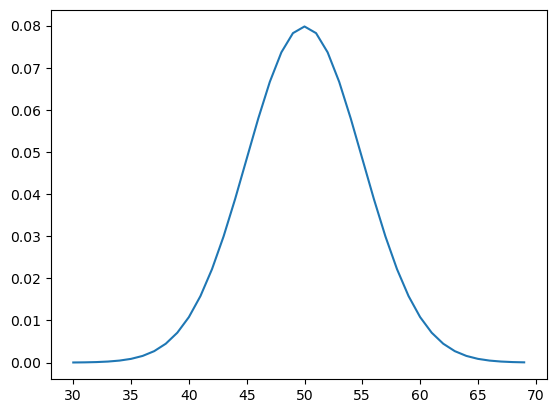

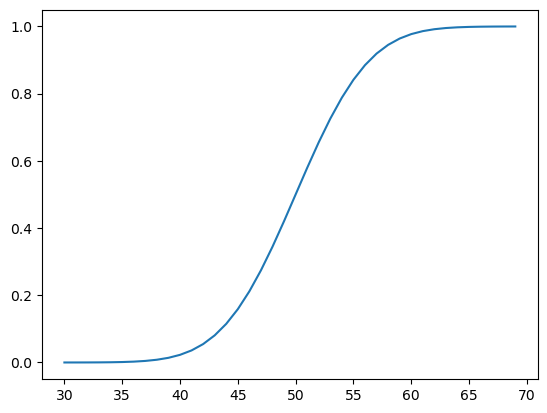

In [14]:

# pdf and cdf for a normal distribution
from scipy.stats import norm
from matplotlib import pyplot
# define distribution parameters
mu = 50
sigma = 5

# create distribution
dist = norm(mu, sigma)
# plot pdf
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
# plot cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()


In [15]:
# calculate the values that define the middle 95%
from scipy.stats import norm
# define distribution parameters
mu = 50
sigma = 5
# create distribution
dist = norm(mu, sigma)
low_end = dist.ppf(0.025)
high_end = dist.ppf(0.975)
print('Middle 95%% between %.1f and %.1f' % (low_end, high_end))

Middle 95% between 40.2 and 59.8


## Exponential Distribution
#### The exponential distribution is a continuous probability distribution where a few outcomes are the most likely with a rapid decrease in probability to all other outcomes. It is the continuous random variable equivalent to the geometric probability distribution for discrete random variables. Some examples of domains that have exponential distribution events include:

- The time between clicks on a Geiger counter.
- The time until the failure of a part.
- The time until the default of a loan.

#### Scale (Beta or β): The mean and standard deviation of the distribution.
#### Sometimes the distribution is defined more formally with a parameter lambda or rate. The beta parameter is defined as the reciprocal of the lambda parameter (β = 1/ λ )
#### Rate (lambda or λ) = Rate of change in the distribution.


In [16]:
# sample an exponential distribution
from numpy.random import exponential
# define the distribution
beta = 50
n = 10
# generate the sample
sample = exponential(beta, n)
print(sample)

[  9.59015466  59.77805004 118.19784895   4.40230663 104.55521876
 199.14230676  20.18207989   1.48975058  23.1350719   42.93612796]


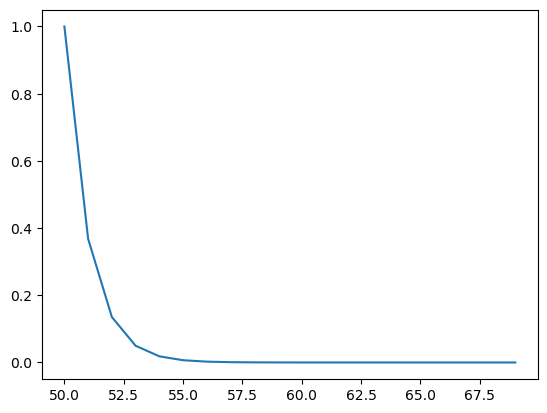

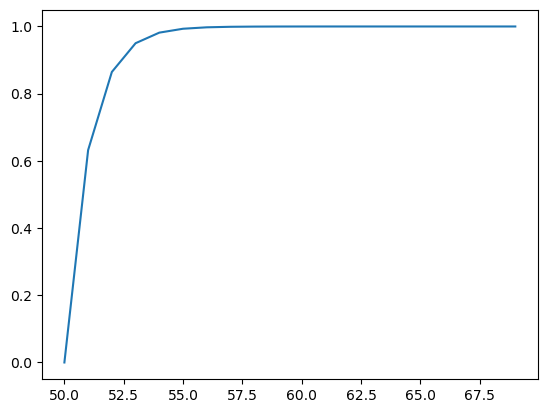

In [17]:

# pdf and cdf for an exponential distribution
from scipy.stats import expon
from matplotlib import pyplot
# define distribution parameter
beta = 50
# create distribution
dist = expon(beta)
# plot pdf
values = [value for value in range(50, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
# plot cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

#### Exponential Distribution: This distribution is often used to model the time between events in a process where events occur continuously and independently at a constant average rate. It's characterized by the parameter λ (rate parameter), which indicates the rate of events.

#### The exponential distribution is a continuous probability distribution that is commonly used to model the time between events in processes where events happen continuously and independently at a constant average rate. Here are some practical examples from various fields to help illustrate where and how exponential distributions can be applied:

- Memorylessness Property: The distribution of the remaining lifetime is the same as the original distribution, regardless of how much time has already passed.
- Constant Hazard Rate: The rate of occurrence of the subsequent event is constant, not dependent on when the last event happened.

## Pareto Distribution

#### A Pareto distribution is named after Vilfredo Pareto and is may be referred to as a power-law distribution. It is also related to the Pareto principle (or 80/20 rule) which is a heuristic for continuous random variables that follow a Pareto distribution, where 80% of the events are covered by 20% of the range of outcomes, e.g. most events are drawn from just 20% of the range of the continuous variable. The Pareto principle is just a heuristic for a specific Pareto distribution, specifically the Pareto Type II distribution, that is perhaps most interesting and on which we will focus.

#### The distribution can be defined using one parameter:
- Shape (alpha or α): The steepness of the decease in probability.

In [18]:
# sample a pareto distribution
from numpy.random import pareto
# define the distribution
alpha = 1.1
n = 10
# generate the sample
sample = pareto(alpha, n)
print(sample)

[ 0.81707986 35.82919674  0.25537583  3.61931436  0.23629874  0.42389352
  1.85786527  0.03610941  1.32947533  5.05828865]


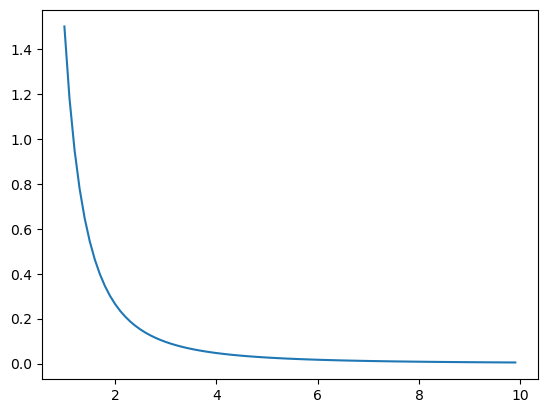

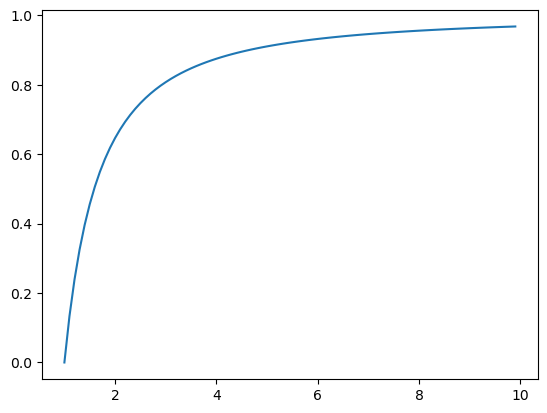

In [19]:
# pdf and cdf for a pareto distribution
from scipy.stats import pareto
from matplotlib import pyplot
# define distribution parameter
alpha = 1.5
# create distribution
dist = pareto(alpha)
# plot pdf
values = [value/10.0 for value in range(10, 100)]
probabilities = [dist.pdf(value) for value in values]
pyplot.plot(values, probabilities)
pyplot.show()
# plot cdf
cprobs = [dist.cdf(value) for value in values]
pyplot.plot(values, cprobs)
pyplot.show()

## Analysis of the Graph
- Shape: The graph shows a quickly declining curve starting high and tapering off as x increases. This is typical for the Pareto distribution, reflecting the "heavy-tailed" nature where smaller values are much more common than larger values.
- Interpretation: In practical terms, if this were a model of wealth distribution (a common use of the Pareto distribution), it would suggest that a large portion of the population has relatively low wealth, but as wealth increases, the frequency of people with higher wealth decreases rapidly.

## Probability Density Function (PDF)

- Applicability: PDF is used with continuous random variables. These variables can take infinitely many values, often any value within an interval on the real number line, such as the exact time a student arrives at school or the exact amount of milk in a jug.
- Function: The PDF describes the relative likelihood for this random variable to occur at each point. It is not the probability that the variable exactly equals any value (those probabilities are all zero for continuous variables) but indicates areas where the variable is more likely to occur.

#### So lets say X is wealth for this example, the curve up and into the right is stating that a 90% of the wealth is in that range?
- Yes, that's a good way to interpret the cumulative distribution function (CDF) of the Pareto distribution in the context of wealth distribution. The CDF tells us the proportion of the total wealth (or whatever variable we're measuring) that lies below or at a certain level.

## Practical Example:
#### If you're analyzing the wealth distribution in a certain region and find that the CDF reaches 0.9 at $100,000, and nearly levels off around $1,000,000 with the CDF at 0.99, you can conclude:

- 90% of the population has $100,000 or less in wealth.
- An additional 9% of the population falls between $100,000 and $1,000,000.
- The top 1% holds wealth above $1,000,000, with each incremental increase in wealth affecting smaller and smaller portions of the population.


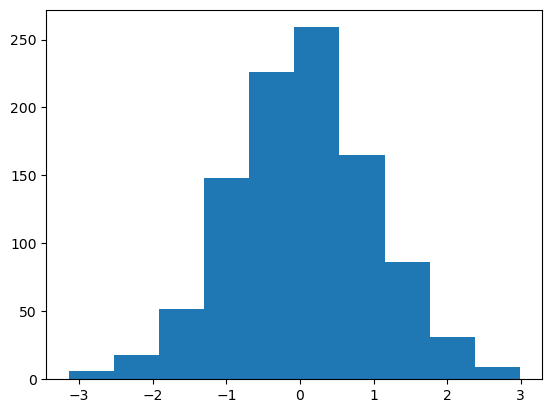

In [21]:
# example of plotting a histogram of a random sample
from matplotlib import pyplot
from numpy.random import normal
# generate a sample
sample = normal(size=1000)
# plot a histogram of the sample
pyplot.hist(sample, bins=10)
pyplot.show()

Mean=49.730, Standard Deviation=4.974


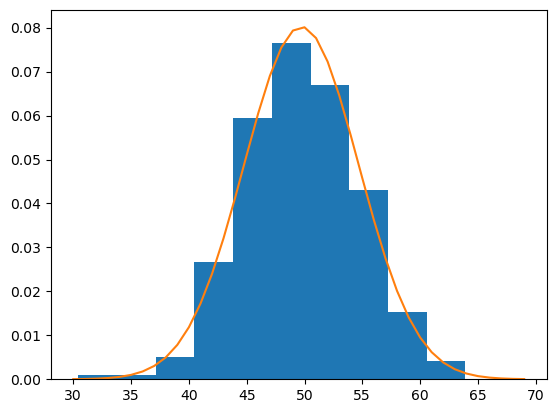

In [4]:
# example of parametric probability density estimation
from matplotlib import pyplot
from numpy.random import normal
from numpy import mean
from numpy import std
from scipy.stats import norm
# generate a sample
sample = normal(loc=50, scale=5, size=1000)
# calculate parameters
sample_mean = mean(sample)
sample_std = std(sample)
print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std)) # define the distribution
dist = norm(sample_mean, sample_std)
# sample probabilities for a range of outcomes
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
# plot the histogram and pdf
pyplot.hist(sample, bins=10, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

## Nonparametric Density Estimation

#### In some cases, a data sample may not resemble a common probability distribution or cannot be easily made to fit the distribution. This is often the case when the data has two peaks (bimodal distribution) or many peaks (multimodal distribution). In this case, parametric density estimation is not feasible and alternative methods can be used that do not use a common distribution. Instead, an algorithm is used to approximate the probability distribution of the data without a pre-defined distribution, referred to as a nonparametric method. The distributions will still have parameters but are not directly controllable in the same way as simple probability distributions. For example, a nonparametric method might estimate the density using all observations in a random sample, in effect making all observations in the sample parameters. Perhaps the most common nonparametric approach for estimating the probability density function of a continuous random variable is called kernel smoothing, orK ernel density estimation, KDE for short.
- Kernel Density Estimation: Nonparametric method for using a dataset to estimating probabilities for new points.

#### In this case, a kernel is a mathematical function that returns a probability for a given value of a random variable. The kernel effectively smooths or interpolates the probabilities across the range of outcomes for a random variable such that the sum of probabilities equals one, a requirement of well-behaved probabilities. The kernel function weights the contribution of observations from a data sample based on their relationship or distance to a given query sample for which the probability is requested.

- Smoothing Parameter (bandwidth): Parameter that controls the number of samples or window of samples used to estimate the probability for a new point.

#### A large window may result in a coarse density with little details, whereas a small window may have too much detail and not be smooth or general enough to correctly cover new or unseen examples. The contribution of samples within the window can be shaped using different functions, sometimes referred to as basis functions, e.g. uniform normal, etc., with different effects on the smoothness of the resulting density function.

- Basis Function (kernel): The function chosen used to control the contribution of samples in the dataset toward estimating the probability of a new point.

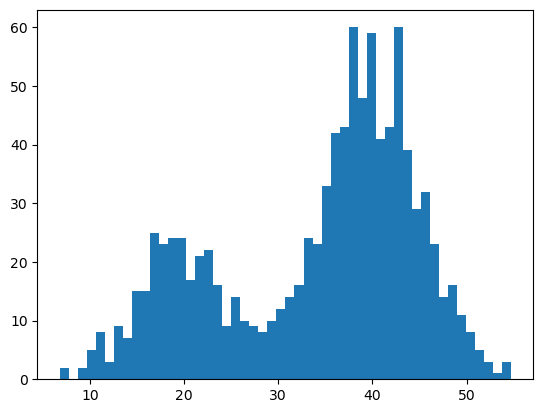

In [9]:
# example of a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack, vstack
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# plot the histogram
pyplot.hist(sample, bins=50)
pyplot.show()

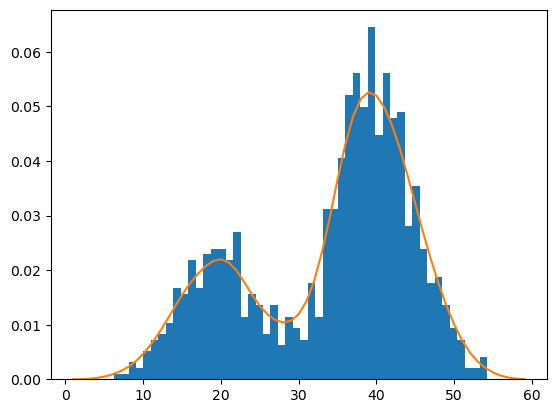

In [13]:
# example of kernel density estimation for a bimodal data sample
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from numpy import asarray
from numpy import exp
from sklearn.neighbors import KernelDensity
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)

sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))
# fit density
model = KernelDensity(bandwidth=2, kernel='gaussian') 
sample = sample.reshape((len(sample), 1)) 
model.fit(sample)
# sample probabilities for a range of outcomes
values = asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = exp(probabilities)
# plot the histogram and pdf
pyplot.hist(sample, bins=50, density=True)
pyplot.plot(values[:], probabilities)
pyplot.show()